In [1]:
import numpy as np
import pandas as pd
import tensorflow
import keras
#from keras.models import Sequential
#from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

Using Theano backend.
WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
C:\Users\Mayur\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
df = pd.read_csv('Modified.csv')
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 13 columns):
date              16829 non-null object
serial_number     16829 non-null object
model             16829 non-null object
capacity_bytes    16829 non-null int64
failure           16829 non-null object
smart_1_raw       16829 non-null float64
smart_5_raw       16829 non-null float64
smart_9_raw       16829 non-null int64
smart_194_raw     16829 non-null int64
smart_197_raw     16829 non-null float64
Temp              16829 non-null float64
Duration          16829 non-null int64
RPM               16829 non-null int64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


In [14]:
#df = df.drop(df.index[range(20000,1048575)])
df.info()        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16829 entries, 0 to 16828
Data columns (total 13 columns):
date              16829 non-null object
serial_number     16829 non-null object
model             16829 non-null object
capacity_bytes    16829 non-null int64
failure           16829 non-null object
smart_1_raw       16829 non-null float64
smart_5_raw       16829 non-null float64
smart_9_raw       16829 non-null int64
smart_194_raw     16829 non-null int64
smart_197_raw     16829 non-null float64
Temp              16829 non-null float64
Duration          16829 non-null int64
RPM               16829 non-null int64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.7+ MB


In [15]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    
    for column in columns:
        text_digit_vals = {} 
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x = x + 1
            
            df[column] = list(map(convert_to_int, df[column]))
    
    return df

In [7]:
df = handle_non_numerical_data(df)

In [8]:
df.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_raw,smart_5_raw,smart_9_raw,smart_194_raw,smart_197_raw,Temp,Duration,RPM
0,79,3386,5,3000592982016,0,12688.97,3306.02,17244,21,90.32,24.183211,81,7109
1,42,9192,1,2000398934016,0,24791.93,3084.01,24839,30,99.51,20.146430,115,5286
2,89,7211,5,3000592982016,0,25327.22,2665.91,8364,26,111.38,20.521995,138,9631
3,212,2133,1,2000398934016,0,24893.94,2698.33,17562,26,116.91,22.560980,102,4488
4,174,9797,5,3000592982016,0,18711.09,2815.64,16956,23,118.83,33.413798,88,11193


In [8]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [9]:
#df = remove_outlier(df, 'FAREAMT_BC')

In [10]:
X = df.drop(['date','serial_number','model'], axis=1)
y = df['failure']

In [11]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

NameError: name 'MinMaxScaler' is not defined

In [12]:
y = df['FAREAMT_BC'].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [26]:
model = Sequential()
model.add(Dense(600, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(400, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

In [27]:
modeldata = model.fit(x_train, y_train, epochs=500, batch_size=50)
model.save("model_4.h5")

Epoch 1/500
16593/16593 [==============================] - 3s 158us/step - loss: 412172.7208
Epoch 2/500
16593/16593 [==============================] - 2s 138us/step - loss: 123312.2438
Epoch 3/500
16593/16593 [==============================] - 2s 121us/step - loss: 120135.2893
Epoch 4/500
16593/16593 [==============================] - 2s 118us/step - loss: 119800.9205
Epoch 5/500
16593/16593 [==============================] - 2s 111us/step - loss: 119719.4186
Epoch 6/500
16593/16593 [==============================] - 2s 119us/step - loss: 119515.7509
Epoch 7/500
16593/16593 [==============================] - 2s 115us/step - loss: 119487.6004
Epoch 8/500
16593/16593 [==============================] - 2s 114us/step - loss: 119604.9010
Epoch 9/500
16593/16593 [==============================] - 2s 118us/step - loss: 119416.6129
Epoch 10/500
16593/16593 [==============================] - 2s 115us/step - loss: 119274.5683
Epoch 11/500
16593/16593 [==============================] - 2s 116us/

16593/16593 [==============================] - 2s 104us/step - loss: 95900.9336
Epoch 175/500
16593/16593 [==============================] - 2s 113us/step - loss: 95311.0859
Epoch 176/500
16593/16593 [==============================] - 2s 104us/step - loss: 95698.9969
Epoch 177/500
16593/16593 [==============================] - 2s 108us/step - loss: 95475.4041
Epoch 178/500
16593/16593 [==============================] - 2s 106us/step - loss: 95045.7292
Epoch 179/500
16593/16593 [==============================] - 2s 108us/step - loss: 95384.1591
Epoch 180/500
16593/16593 [==============================] - 2s 106us/step - loss: 94368.2134
Epoch 181/500
16593/16593 [==============================] - 2s 111us/step - loss: 94288.8089
Epoch 182/500
16593/16593 [==============================] - 2s 104us/step - loss: 93958.7710
Epoch 183/500
16593/16593 [==============================] - 2s 108us/step - loss: 93727.1947
Epoch 184/500
16593/16593 [==============================] - 2s 105us/step

16593/16593 [==============================] - 2s 103us/step - loss: 59845.6825
Epoch 349/500
16593/16593 [==============================] - 2s 104us/step - loss: 59861.6808
Epoch 350/500
16593/16593 [==============================] - 2s 107us/step - loss: 59975.6842
Epoch 351/500
16593/16593 [==============================] - 2s 107us/step - loss: 59702.0939
Epoch 352/500
16593/16593 [==============================] - 2s 105us/step - loss: 59139.8354
Epoch 353/500
16593/16593 [==============================] - 2s 105us/step - loss: 59872.5055
Epoch 354/500
16593/16593 [==============================] - 2s 104us/step - loss: 59208.3546
Epoch 355/500
16593/16593 [==============================] - 2s 105us/step - loss: 59172.1595
Epoch 356/500
16593/16593 [==============================] - 2s 114us/step - loss: 59274.8307
Epoch 357/500
16593/16593 [==============================] - 2s 104us/step - loss: 59814.8123
Epoch 358/500
16593/16593 [==============================] - 2s 106us/step

In [15]:
#from keras.models import load_model
#model = load_model('model_3.h5')

In [20]:
results = model.evaluate(x_test, y_test, verbose=1)

1844/1844 [==============================] - 0s 217us/step


In [21]:
results

64672.446854663773

In [28]:
kfold = KFold(n_splits=10, shuffle=True, random_state=123)
cvresults = []
for train, test in kfold.split(X, y):
    model.fit(X[train], y[train], epochs=500, batch_size=30, verbose=1)
    results = model.evaluate(X[test], y[test], verbose=1)
    cvresults.append(results)
model.save("model_4_improved.h5")

Epoch 1/500
16593/16593 [==============================] - 3s 195us/step - loss: 51777.7659
Epoch 2/500
16593/16593 [==============================] - 3s 198us/step - loss: 51300.1416
Epoch 3/500
16593/16593 [==============================] - 3s 194us/step - loss: 50857.9492
Epoch 4/500
16593/16593 [==============================] - 3s 205us/step - loss: 50530.0842
Epoch 5/500
16593/16593 [==============================] - 3s 197us/step - loss: 50555.9959
Epoch 6/500
16593/16593 [==============================] - 3s 194us/step - loss: 51258.4495
Epoch 7/500
16593/16593 [==============================] - 3s 194us/step - loss: 50324.6427
Epoch 8/500
16593/16593 [==============================] - 3s 198us/step - loss: 50275.7624
Epoch 9/500
16593/16593 [==============================] - 3s 192us/step - loss: 50914.9767
Epoch 10/500
16593/16593 [==============================] - 3s 193us/step - loss: 51061.0822
Epoch 11/500
16593/16593 [==============================] - 3s 195us/step - los

16593/16593 [==============================] - 3s 191us/step - loss: 43083.9884
Epoch 177/500
16593/16593 [==============================] - 3s 190us/step - loss: 42754.1404
Epoch 178/500
16593/16593 [==============================] - 3s 191us/step - loss: 43080.7419
Epoch 179/500
16593/16593 [==============================] - 3s 190us/step - loss: 42840.3594
Epoch 180/500
16593/16593 [==============================] - 3s 194us/step - loss: 43131.8942
Epoch 181/500
16593/16593 [==============================] - 3s 190us/step - loss: 42935.4463
Epoch 182/500
16593/16593 [==============================] - 3s 187us/step - loss: 42422.5405
Epoch 183/500
16593/16593 [==============================] - 3s 193us/step - loss: 42537.8233
Epoch 184/500
16593/16593 [==============================] - 3s 191us/step - loss: 42634.3299
Epoch 185/500
16593/16593 [==============================] - 3s 187us/step - loss: 42782.6987
Epoch 186/500
16593/16593 [==============================] - 3s 190us/step

16593/16593 [==============================] - 3s 189us/step - loss: 37059.8878
Epoch 351/500
16593/16593 [==============================] - 3s 191us/step - loss: 37095.7639
Epoch 352/500
16593/16593 [==============================] - 3s 188us/step - loss: 37065.4707
Epoch 353/500
16593/16593 [==============================] - 3s 193us/step - loss: 36929.5271
Epoch 354/500
16593/16593 [==============================] - 3s 198us/step - loss: 36962.0020
Epoch 355/500
16593/16593 [==============================] - 3s 191us/step - loss: 36547.4675
Epoch 356/500
16593/16593 [==============================] - 3s 189us/step - loss: 37211.8020
Epoch 357/500
16593/16593 [==============================] - 3s 195us/step - loss: 37045.7761
Epoch 358/500
16593/16593 [==============================] - 3s 191us/step - loss: 36631.3947
Epoch 359/500
16593/16593 [==============================] - 3s 183us/step - loss: 36901.2025
Epoch 360/500
16593/16593 [==============================] - 3s 183us/step

16593/16593 [==============================] - 3s 193us/step - loss: 33710.7100
Epoch 25/500
16593/16593 [==============================] - 3s 197us/step - loss: 33553.8546
Epoch 26/500
16593/16593 [==============================] - 5s 283us/step - loss: 33373.2820
Epoch 27/500
16593/16593 [==============================] - 3s 195us/step - loss: 33546.8681
Epoch 28/500
16593/16593 [==============================] - 3s 187us/step - loss: 33302.3399
Epoch 29/500
16593/16593 [==============================] - 3s 186us/step - loss: 33398.8230
Epoch 30/500
16593/16593 [==============================] - 3s 182us/step - loss: 33155.5454
Epoch 31/500
16593/16593 [==============================] - 3s 184us/step - loss: 33402.9434
Epoch 32/500
16593/16593 [==============================] - 3s 185us/step - loss: 33600.1211
Epoch 33/500
16593/16593 [==============================] - 3s 195us/step - loss: 33428.8034
Epoch 34/500
16593/16593 [==============================] - 3s 194us/step - loss: 3

16593/16593 [==============================] - 3s 190us/step - loss: 31014.9682
Epoch 113/500
16593/16593 [==============================] - 5s 287us/step - loss: 31004.0096
Epoch 114/500
16593/16593 [==============================] - 3s 191us/step - loss: 30583.3696
Epoch 115/500
16593/16593 [==============================] - 3s 187us/step - loss: 31570.7753
Epoch 116/500
16593/16593 [==============================] - 3s 184us/step - loss: 30777.3059
Epoch 117/500
16593/16593 [==============================] - 3s 194us/step - loss: 30853.5023
Epoch 118/500
16593/16593 [==============================] - 3s 184us/step - loss: 30925.4900
Epoch 119/500
16593/16593 [==============================] - 3s 182us/step - loss: 30816.8725
Epoch 120/500
16593/16593 [==============================] - 3s 183us/step - loss: 30862.1132
Epoch 121/500
16593/16593 [==============================] - 3s 184us/step - loss: 30934.9242
Epoch 122/500
16593/16593 [==============================] - 3s 191us/step

16593/16593 [==============================] - 3s 197us/step - loss: 27621.5254
Epoch 287/500
16593/16593 [==============================] - 5s 291us/step - loss: 27508.6361
Epoch 288/500
16593/16593 [==============================] - 3s 197us/step - loss: 27410.5939
Epoch 289/500
16593/16593 [==============================] - 3s 192us/step - loss: 27257.6230
Epoch 290/500
16593/16593 [==============================] - 3s 182us/step - loss: 27808.8674
Epoch 291/500
16593/16593 [==============================] - 3s 186us/step - loss: 27468.9780
Epoch 292/500
16593/16593 [==============================] - 3s 183us/step - loss: 27516.0740
Epoch 293/500
16593/16593 [==============================] - 3s 190us/step - loss: 27367.8575
Epoch 294/500
16593/16593 [==============================] - 3s 185us/step - loss: 27607.7451
Epoch 295/500
16593/16593 [==============================] - 3s 183us/step - loss: 27301.5081
Epoch 296/500
16593/16593 [==============================] - 3s 184us/step

16593/16593 [==============================] - 3s 189us/step - loss: 25104.0976
Epoch 461/500
16593/16593 [==============================] - 3s 185us/step - loss: 25460.1903
Epoch 462/500
16593/16593 [==============================] - 3s 191us/step - loss: 24662.5475
Epoch 463/500
16593/16593 [==============================] - 3s 183us/step - loss: 24976.7755
Epoch 464/500
16593/16593 [==============================] - 3s 189us/step - loss: 25010.9641
Epoch 465/500
16593/16593 [==============================] - 3s 195us/step - loss: 24950.3224
Epoch 466/500
16593/16593 [==============================] - 3s 190us/step - loss: 24824.0815
Epoch 467/500
16593/16593 [==============================] - 3s 182us/step - loss: 25430.9133
Epoch 468/500
16593/16593 [==============================] - 3s 192us/step - loss: 24878.4580
Epoch 469/500
16593/16593 [==============================] - 5s 271us/step - loss: 24845.3559 0s - loss: 24826.76
Epoch 470/500
16593/16593 [===========================

16593/16593 [==============================] - 3s 191us/step - loss: 24956.5927
Epoch 48/500
16593/16593 [==============================] - 3s 187us/step - loss: 25194.2177
Epoch 49/500
16593/16593 [==============================] - 3s 190us/step - loss: 24898.7975
Epoch 50/500
16593/16593 [==============================] - 3s 190us/step - loss: 24706.5378
Epoch 51/500
16593/16593 [==============================] - 3s 190us/step - loss: 24724.7939
Epoch 52/500
16593/16593 [==============================] - 3s 184us/step - loss: 24789.5225
Epoch 53/500
16593/16593 [==============================] - 3s 186us/step - loss: 24910.7212
Epoch 54/500
16593/16593 [==============================] - 3s 187us/step - loss: 24485.4483
Epoch 55/500
16593/16593 [==============================] - 3s 192us/step - loss: 24722.2479
Epoch 56/500
16593/16593 [==============================] - 3s 189us/step - loss: 24528.8836
Epoch 57/500
16593/16593 [==============================] - 3s 197us/step - loss: 2

16593/16593 [==============================] - 3s 186us/step - loss: 22398.8694
Epoch 222/500
16593/16593 [==============================] - 3s 186us/step - loss: 22087.4568
Epoch 223/500
16593/16593 [==============================] - 3s 183us/step - loss: 21817.3757
Epoch 224/500
16593/16593 [==============================] - 3s 186us/step - loss: 22363.6230
Epoch 225/500
16593/16593 [==============================] - 3s 185us/step - loss: 22204.0358
Epoch 226/500
16593/16593 [==============================] - 3s 183us/step - loss: 22115.7995
Epoch 227/500
16593/16593 [==============================] - 3s 189us/step - loss: 22035.9155
Epoch 228/500
16593/16593 [==============================] - 3s 185us/step - loss: 22296.5522
Epoch 229/500
16593/16593 [==============================] - 3s 188us/step - loss: 22342.2446
Epoch 230/500
16593/16593 [==============================] - 3s 186us/step - loss: 21819.5199
Epoch 231/500
16593/16593 [==============================] - 3s 185us/step

16593/16593 [==============================] - 3s 184us/step - loss: 19195.4144
Epoch 396/500
16593/16593 [==============================] - 3s 185us/step - loss: 19219.3339
Epoch 397/500
16593/16593 [==============================] - 3s 185us/step - loss: 19085.0552
Epoch 398/500
16593/16593 [==============================] - 3s 185us/step - loss: 19074.4090
Epoch 399/500
16593/16593 [==============================] - 3s 183us/step - loss: 19014.1509
Epoch 400/500
16593/16593 [==============================] - 3s 197us/step - loss: 19493.0765
Epoch 401/500
16593/16593 [==============================] - 3s 192us/step - loss: 19182.4404
Epoch 402/500
16593/16593 [==============================] - 3s 186us/step - loss: 18862.1024
Epoch 403/500
16593/16593 [==============================] - 3s 184us/step - loss: 18691.7974
Epoch 404/500
16593/16593 [==============================] - 3s 186us/step - loss: 18959.1193
Epoch 405/500
16593/16593 [==============================] - 3s 186us/step

16593/16593 [==============================] - 3s 187us/step - loss: 17215.7886
Epoch 70/500
16593/16593 [==============================] - 3s 190us/step - loss: 17404.1777
Epoch 71/500
16593/16593 [==============================] - 3s 185us/step - loss: 17177.4497
Epoch 72/500
16593/16593 [==============================] - 3s 191us/step - loss: 17032.1207
Epoch 73/500
16593/16593 [==============================] - 3s 185us/step - loss: 17260.8442
Epoch 74/500
16593/16593 [==============================] - 3s 182us/step - loss: 17124.7426
Epoch 75/500
16593/16593 [==============================] - 3s 190us/step - loss: 16660.9646
Epoch 76/500
16593/16593 [==============================] - 4s 235us/step - loss: 17006.6276
Epoch 77/500
16593/16593 [==============================] - 3s 199us/step - loss: 16798.4662
Epoch 78/500
16593/16593 [==============================] - 3s 187us/step - loss: 17171.1224
Epoch 79/500
16593/16593 [==============================] - 3s 191us/step - loss: 1

16593/16593 [==============================] - 3s 184us/step - loss: 14248.5018
Epoch 244/500
16593/16593 [==============================] - 3s 187us/step - loss: 14501.5020
Epoch 245/500
16593/16593 [==============================] - 3s 188us/step - loss: 14580.4486
Epoch 246/500
16593/16593 [==============================] - 3s 184us/step - loss: 14704.9876
Epoch 247/500
16593/16593 [==============================] - 3s 186us/step - loss: 14246.9045
Epoch 248/500
16593/16593 [==============================] - 3s 190us/step - loss: 14070.9084
Epoch 249/500
16593/16593 [==============================] - 3s 185us/step - loss: 13941.4582
Epoch 250/500
16593/16593 [==============================] - 3s 183us/step - loss: 14243.9254
Epoch 251/500
16593/16593 [==============================] - 3s 185us/step - loss: 13974.4602
Epoch 252/500
16593/16593 [==============================] - 3s 185us/step - loss: 13961.1152
Epoch 253/500
16593/16593 [==============================] - 3s 185us/step

16593/16593 [==============================] - 3s 210us/step - loss: 12288.1887
Epoch 418/500
16593/16593 [==============================] - 3s 199us/step - loss: 12457.8912
Epoch 419/500
16593/16593 [==============================] - 3s 192us/step - loss: 12194.0789
Epoch 420/500
16593/16593 [==============================] - 4s 240us/step - loss: 12048.0875
Epoch 421/500
16593/16593 [==============================] - 6s 377us/step - loss: 12142.7031
Epoch 422/500
16593/16593 [==============================] - 3s 208us/step - loss: 12095.7327
Epoch 423/500
16593/16593 [==============================] - 3s 197us/step - loss: 12012.4852
Epoch 424/500
16593/16593 [==============================] - 3s 193us/step - loss: 12160.1935
Epoch 425/500
16593/16593 [==============================] - 3s 191us/step - loss: 12201.2460
Epoch 426/500
16593/16593 [==============================] - 3s 191us/step - loss: 11854.3898
Epoch 427/500
16593/16593 [==============================] - 3s 194us/step

16593/16593 [==============================] - 3s 190us/step - loss: 11258.3413
Epoch 92/500
16593/16593 [==============================] - 3s 194us/step - loss: 11347.6624
Epoch 93/500
16593/16593 [==============================] - 3s 189us/step - loss: 11336.8642
Epoch 94/500
16593/16593 [==============================] - 3s 187us/step - loss: 11571.3552
Epoch 95/500
16593/16593 [==============================] - 3s 197us/step - loss: 11425.3317
Epoch 96/500
16593/16593 [==============================] - 3s 195us/step - loss: 11190.5765
Epoch 97/500
16593/16593 [==============================] - 4s 215us/step - loss: 11424.5380
Epoch 98/500
16593/16593 [==============================] - 3s 196us/step - loss: 11103.2641
Epoch 99/500
16593/16593 [==============================] - 3s 189us/step - loss: 10980.3917
Epoch 100/500
16593/16593 [==============================] - 3s 192us/step - loss: 11326.4517
Epoch 101/500
16593/16593 [==============================] - 3s 190us/step - loss:

16593/16593 [==============================] - 3s 186us/step - loss: 9737.5973
Epoch 266/500
16593/16593 [==============================] - 3s 187us/step - loss: 9614.0441
Epoch 267/500
16593/16593 [==============================] - 3s 185us/step - loss: 9647.8086
Epoch 268/500
16593/16593 [==============================] - 3s 186us/step - loss: 9701.1555
Epoch 269/500
16593/16593 [==============================] - 3s 191us/step - loss: 9820.5253
Epoch 270/500
16593/16593 [==============================] - 3s 186us/step - loss: 9844.8097
Epoch 271/500
16593/16593 [==============================] - 3s 182us/step - loss: 9254.0492
Epoch 272/500
16593/16593 [==============================] - 3s 185us/step - loss: 9904.1835
Epoch 273/500
16593/16593 [==============================] - 3s 190us/step - loss: 9623.2844
Epoch 274/500
16593/16593 [==============================] - 3s 190us/step - loss: 9729.4347
Epoch 275/500
16593/16593 [==============================] - 3s 189us/step - loss: 9

Epoch 441/500
16593/16593 [==============================] - 3s 180us/step - loss: 8726.8454
Epoch 442/500
16593/16593 [==============================] - 3s 202us/step - loss: 8849.9644
Epoch 443/500
16593/16593 [==============================] - 5s 298us/step - loss: 8540.1629
Epoch 444/500
16593/16593 [==============================] - 3s 187us/step - loss: 8651.9563
Epoch 445/500
16593/16593 [==============================] - 3s 187us/step - loss: 8484.1670
Epoch 446/500
16593/16593 [==============================] - 3s 193us/step - loss: 8436.8875
Epoch 447/500
16593/16593 [==============================] - 3s 185us/step - loss: 8411.9369
Epoch 448/500
16593/16593 [==============================] - 3s 185us/step - loss: 8554.7508
Epoch 449/500
16593/16593 [==============================] - 3s 185us/step - loss: 8630.7030
Epoch 450/500
16593/16593 [==============================] - 3s 176us/step - loss: 8373.9922
Epoch 451/500
16593/16593 [==============================] - 3s 186us/

16593/16593 [==============================] - 3s 186us/step - loss: 8778.9868
Epoch 118/500
16593/16593 [==============================] - 3s 188us/step - loss: 8136.1263
Epoch 119/500
16593/16593 [==============================] - 3s 184us/step - loss: 8612.6672
Epoch 120/500
16593/16593 [==============================] - 3s 184us/step - loss: 8347.7768
Epoch 121/500
16593/16593 [==============================] - 3s 187us/step - loss: 8088.8689
Epoch 122/500
16593/16593 [==============================] - 3s 182us/step - loss: 8729.2254
Epoch 123/500
16593/16593 [==============================] - 3s 195us/step - loss: 8313.3380
Epoch 124/500
16593/16593 [==============================] - 3s 185us/step - loss: 8280.6925
Epoch 125/500
16593/16593 [==============================] - 3s 186us/step - loss: 8380.6162
Epoch 126/500
16593/16593 [==============================] - 3s 186us/step - loss: 8515.9404
Epoch 127/500
16593/16593 [==============================] - 3s 187us/step - loss: 8

16593/16593 [==============================] - 3s 202us/step - loss: 7781.2177
Epoch 294/500
16593/16593 [==============================] - 3s 193us/step - loss: 7108.9905
Epoch 295/500
16593/16593 [==============================] - 3s 180us/step - loss: 7496.4890
Epoch 296/500
16593/16593 [==============================] - 3s 186us/step - loss: 7638.4409
Epoch 297/500
16593/16593 [==============================] - 3s 184us/step - loss: 7296.3696
Epoch 298/500
16593/16593 [==============================] - 5s 294us/step - loss: 7351.0383
Epoch 299/500
16593/16593 [==============================] - 4s 221us/step - loss: 7529.3306
Epoch 300/500
16593/16593 [==============================] - 4s 251us/step - loss: 7245.9258
Epoch 301/500
16593/16593 [==============================] - 4s 249us/step - loss: 7474.4859
Epoch 302/500
16593/16593 [==============================] - 3s 193us/step - loss: 7419.4455
Epoch 303/500
16593/16593 [==============================] - 3s 182us/step - loss: 7

16593/16593 [==============================] - 3s 191us/step - loss: 6837.0761
Epoch 470/500
16593/16593 [==============================] - 4s 270us/step - loss: 6829.1112
Epoch 471/500
16593/16593 [==============================] - 3s 200us/step - loss: 6776.0237
Epoch 472/500
16593/16593 [==============================] - 3s 192us/step - loss: 6741.8079
Epoch 473/500
16593/16593 [==============================] - 5s 317us/step - loss: 6652.2756
Epoch 474/500
16593/16593 [==============================] - 4s 212us/step - loss: 6739.0547
Epoch 475/500
16593/16593 [==============================] - 3s 189us/step - loss: 6727.9469
Epoch 476/500
16593/16593 [==============================] - 3s 186us/step - loss: 6420.5069
Epoch 477/500
16593/16593 [==============================] - 3s 181us/step - loss: 6639.0944
Epoch 478/500
16593/16593 [==============================] - 3s 206us/step - loss: 6785.7050
Epoch 479/500
16593/16593 [==============================] - 4s 240us/step - loss: 6

16593/16593 [==============================] - 3s 180us/step - loss: 6735.3515
Epoch 146/500
16593/16593 [==============================] - 3s 185us/step - loss: 6865.8648
Epoch 147/500
16593/16593 [==============================] - 3s 185us/step - loss: 6426.9031
Epoch 148/500
16593/16593 [==============================] - 3s 184us/step - loss: 6579.3393
Epoch 149/500
16593/16593 [==============================] - 3s 187us/step - loss: 6419.5239
Epoch 150/500
16593/16593 [==============================] - 3s 180us/step - loss: 6722.6034
Epoch 151/500
16593/16593 [==============================] - 3s 187us/step - loss: 6792.2572
Epoch 152/500
16593/16593 [==============================] - 3s 189us/step - loss: 6629.7035
Epoch 153/500
16593/16593 [==============================] - 3s 182us/step - loss: 6706.7092
Epoch 154/500
16593/16593 [==============================] - 3s 203us/step - loss: 6491.2973
Epoch 155/500
16593/16593 [==============================] - 4s 218us/step - loss: 6

16593/16593 [==============================] - 3s 188us/step - loss: 6012.6883
Epoch 322/500
16593/16593 [==============================] - 3s 190us/step - loss: 5778.6714
Epoch 323/500
16593/16593 [==============================] - 3s 182us/step - loss: 6499.5167
Epoch 324/500
16593/16593 [==============================] - 3s 182us/step - loss: 5813.0904
Epoch 325/500
16593/16593 [==============================] - 5s 311us/step - loss: 5986.3819
Epoch 326/500
16593/16593 [==============================] - 3s 199us/step - loss: 5843.3309
Epoch 327/500
16593/16593 [==============================] - 3s 185us/step - loss: 6314.0692
Epoch 328/500
16593/16593 [==============================] - 3s 189us/step - loss: 5943.3290
Epoch 329/500
16593/16593 [==============================] - 3s 185us/step - loss: 6042.1167
Epoch 330/500
16593/16593 [==============================] - 3s 181us/step - loss: 5901.3964
Epoch 331/500
16593/16593 [==============================] - 4s 230us/step - loss: 6

Epoch 409/500
16593/16593 [==============================] - 3s 192us/step - loss: 5687.2559
Epoch 410/500
16593/16593 [==============================] - 3s 189us/step - loss: 5931.4264
Epoch 411/500
16593/16593 [==============================] - 3s 182us/step - loss: 5636.2239
Epoch 412/500
16593/16593 [==============================] - 3s 185us/step - loss: 5883.1798
Epoch 413/500
16593/16593 [==============================] - 3s 194us/step - loss: 5636.0879
Epoch 414/500
16593/16593 [==============================] - 3s 190us/step - loss: 5657.8214
Epoch 415/500
16593/16593 [==============================] - 3s 190us/step - loss: 5610.9920
Epoch 416/500
16593/16593 [==============================] - 3s 188us/step - loss: 5817.6349
Epoch 417/500
16593/16593 [==============================] - 3s 187us/step - loss: 5677.8061
Epoch 418/500
16593/16593 [==============================] - 3s 183us/step - loss: 5547.2003
Epoch 419/500
16593/16593 [==============================] - 3s 181us/

16593/16593 [==============================] - 3s 190us/step - loss: 5922.2022
Epoch 498/500
16593/16593 [==============================] - 3s 182us/step - loss: 5490.3778
Epoch 499/500
16593/16593 [==============================] - 3s 185us/step - loss: 5476.6797
Epoch 500/500
1844/1844 [==============================] - 0s 42us/step
Epoch 1/500
16594/16594 [==============================] - 3s 185us/step - loss: 6980.8058
Epoch 2/500
16594/16594 [==============================] - 3s 183us/step - loss: 7034.2601
Epoch 3/500
16594/16594 [==============================] - 3s 186us/step - loss: 6500.4063
Epoch 4/500
16594/16594 [==============================] - 3s 181us/step - loss: 6640.8847
Epoch 5/500
16594/16594 [==============================] - 3s 183us/step - loss: 6289.7168
Epoch 6/500
16594/16594 [==============================] - 3s 181us/step - loss: 6589.9339
Epoch 7/500
16594/16594 [==============================] - 3s 180us/step - loss: 6571.3951
Epoch 8/500
16594/16594 [=

16594/16594 [==============================] - 3s 190us/step - loss: 5380.1824
Epoch 174/500
16594/16594 [==============================] - 3s 184us/step - loss: 5475.6104
Epoch 175/500
16594/16594 [==============================] - 3s 184us/step - loss: 5545.6166
Epoch 176/500
16594/16594 [==============================] - 3s 190us/step - loss: 5382.4252
Epoch 177/500
16594/16594 [==============================] - 3s 187us/step - loss: 5375.1831
Epoch 178/500
16594/16594 [==============================] - 3s 200us/step - loss: 5343.8321
Epoch 179/500
16594/16594 [==============================] - 4s 267us/step - loss: 5488.3497
Epoch 180/500
16594/16594 [==============================] - 3s 194us/step - loss: 5448.5277
Epoch 181/500
16594/16594 [==============================] - 3s 184us/step - loss: 5412.5848
Epoch 182/500
16594/16594 [==============================] - 3s 184us/step - loss: 5381.9087
Epoch 183/500
16594/16594 [==============================] - 3s 185us/step - loss: 5

Epoch 261/500
16594/16594 [==============================] - 3s 189us/step - loss: 5199.5878
Epoch 262/500
16594/16594 [==============================] - 3s 188us/step - loss: 5085.9994
Epoch 263/500
16594/16594 [==============================] - 3s 180us/step - loss: 5077.4075
Epoch 264/500
16594/16594 [==============================] - 3s 180us/step - loss: 5076.5857
Epoch 265/500
16594/16594 [==============================] - 3s 192us/step - loss: 5468.6842
Epoch 266/500
16594/16594 [==============================] - 5s 298us/step - loss: 5154.5750
Epoch 267/500
16594/16594 [==============================] - 3s 195us/step - loss: 5223.8234
Epoch 268/500
16594/16594 [==============================] - 3s 182us/step - loss: 5010.6637
Epoch 269/500
16594/16594 [==============================] - 3s 189us/step - loss: 5027.1031
Epoch 270/500
16594/16594 [==============================] - 3s 185us/step - loss: 5287.6560
Epoch 271/500
16594/16594 [==============================] - 3s 186us/

16594/16594 [==============================] - 3s 190us/step - loss: 4904.1916
Epoch 350/500
16594/16594 [==============================] - 3s 187us/step - loss: 5426.3014
Epoch 351/500
16594/16594 [==============================] - 3s 187us/step - loss: 4913.4238
Epoch 352/500
16594/16594 [==============================] - 3s 179us/step - loss: 4862.6613
Epoch 353/500
16594/16594 [==============================] - 3s 198us/step - loss: 4970.7165
Epoch 354/500
16594/16594 [==============================] - 4s 221us/step - loss: 5071.2644
Epoch 355/500
16594/16594 [==============================] - 3s 186us/step - loss: 4773.2090
Epoch 356/500
16594/16594 [==============================] - 3s 186us/step - loss: 4999.0735
Epoch 357/500
16594/16594 [==============================] - 3s 188us/step - loss: 5132.6685
Epoch 358/500
16594/16594 [==============================] - 3s 185us/step - loss: 5081.9531
Epoch 359/500
16594/16594 [==============================] - 3s 184us/step - loss: 4

Epoch 25/500
16594/16594 [==============================] - 3s 180us/step - loss: 5050.8075
Epoch 26/500
16594/16594 [==============================] - 3s 182us/step - loss: 5529.3443
Epoch 27/500
16594/16594 [==============================] - 3s 187us/step - loss: 5438.8181
Epoch 28/500
16594/16594 [==============================] - 3s 181us/step - loss: 4818.6672
Epoch 29/500
16594/16594 [==============================] - 3s 182us/step - loss: 5080.9039
Epoch 30/500
16594/16594 [==============================] - 5s 299us/step - loss: 5180.3201
Epoch 31/500
16594/16594 [==============================] - 3s 196us/step - loss: 4854.7769
Epoch 32/500
16594/16594 [==============================] - 3s 187us/step - loss: 5828.4987
Epoch 33/500
16594/16594 [==============================] - 3s 196us/step - loss: 4687.2159
Epoch 34/500
16594/16594 [==============================] - 3s 187us/step - loss: 5015.2536
Epoch 35/500
16594/16594 [==============================] - 3s 188us/step - loss

16594/16594 [==============================] - 3s 185us/step - loss: 4425.5004
Epoch 202/500
16594/16594 [==============================] - 3s 194us/step - loss: 4455.4646
Epoch 203/500
16594/16594 [==============================] - 3s 209us/step - loss: 4584.2350
Epoch 204/500
16594/16594 [==============================] - 4s 220us/step - loss: 4422.3066
Epoch 205/500
16594/16594 [==============================] - 3s 184us/step - loss: 4669.3963
Epoch 206/500
16594/16594 [==============================] - 3s 188us/step - loss: 4448.9466
Epoch 207/500
16594/16594 [==============================] - 3s 186us/step - loss: 4581.8705
Epoch 208/500
16594/16594 [==============================] - 3s 184us/step - loss: 4656.0448
Epoch 209/500
16594/16594 [==============================] - 3s 184us/step - loss: 4462.7333
Epoch 210/500
16594/16594 [==============================] - 5s 294us/step - loss: 4519.8321
Epoch 211/500
16594/16594 [==============================] - 3s 202us/step - loss: 4

16594/16594 [==============================] - 3s 183us/step - loss: 4004.0553
Epoch 378/500
16594/16594 [==============================] - 3s 185us/step - loss: 4237.9006
Epoch 379/500
16594/16594 [==============================] - 3s 181us/step - loss: 4369.8085
Epoch 380/500
16594/16594 [==============================] - 3s 187us/step - loss: 4039.0872
Epoch 381/500
16594/16594 [==============================] - 4s 215us/step - loss: 4108.6442
Epoch 382/500
16594/16594 [==============================] - 4s 257us/step - loss: 4038.4077
Epoch 383/500
16594/16594 [==============================] - 3s 193us/step - loss: 4095.1002
Epoch 384/500
16594/16594 [==============================] - 3s 188us/step - loss: 4372.7173
Epoch 385/500
16594/16594 [==============================] - 3s 188us/step - loss: 4017.7590
Epoch 386/500
16594/16594 [==============================] - 3s 190us/step - loss: 4166.5724
Epoch 387/500
16594/16594 [==============================] - 3s 183us/step - loss: 4

16594/16594 [==============================] - 3s 184us/step - loss: 4177.9196
Epoch 54/500
16594/16594 [==============================] - 3s 185us/step - loss: 4234.7789
Epoch 55/500
16594/16594 [==============================] - 3s 182us/step - loss: 4287.5523
Epoch 56/500
16594/16594 [==============================] - 3s 187us/step - loss: 4259.3629
Epoch 57/500
16594/16594 [==============================] - 3s 184us/step - loss: 4409.7530
Epoch 58/500
16594/16594 [==============================] - 3s 198us/step - loss: 4332.8485
Epoch 59/500
16594/16594 [==============================] - 5s 282us/step - loss: 4271.5048
Epoch 60/500
16594/16594 [==============================] - 3s 192us/step - loss: 4192.7761
Epoch 61/500
16594/16594 [==============================] - 5s 280us/step - loss: 4367.1224
Epoch 62/500
16594/16594 [==============================] - 3s 202us/step - loss: 4607.9782
Epoch 63/500
16594/16594 [==============================] - 3s 184us/step - loss: 4121.9176
E

Epoch 229/500
16594/16594 [==============================] - 3s 183us/step - loss: 3774.8219
Epoch 230/500
16594/16594 [==============================] - 3s 200us/step - loss: 3844.2877
Epoch 231/500
16594/16594 [==============================] - 3s 187us/step - loss: 4181.1413
Epoch 232/500
16594/16594 [==============================] - 3s 187us/step - loss: 3627.2318
Epoch 233/500
16594/16594 [==============================] - 3s 185us/step - loss: 4051.2025
Epoch 234/500
16594/16594 [==============================] - 3s 183us/step - loss: 3889.2029
Epoch 235/500
16594/16594 [==============================] - 3s 187us/step - loss: 4097.0145
Epoch 236/500
16594/16594 [==============================] - 3s 183us/step - loss: 3795.4397
Epoch 237/500
16594/16594 [==============================] - 3s 189us/step - loss: 3917.0574
Epoch 238/500
16594/16594 [==============================] - 3s 184us/step - loss: 3945.2614
Epoch 239/500
16594/16594 [==============================] - 3s 184us/

16594/16594 [==============================] - 3s 183us/step - loss: 3647.3305
Epoch 318/500
16594/16594 [==============================] - 3s 203us/step - loss: 3707.9801
Epoch 319/500
16594/16594 [==============================] - 4s 222us/step - loss: 3899.4905
Epoch 320/500
16594/16594 [==============================] - 3s 187us/step - loss: 3840.6343
Epoch 321/500
16594/16594 [==============================] - 4s 224us/step - loss: 3717.6714
Epoch 322/500
16594/16594 [==============================] - 4s 270us/step - loss: 3609.1160
Epoch 323/500
16594/16594 [==============================] - 3s 187us/step - loss: 3764.5600
Epoch 324/500
16594/16594 [==============================] - 3s 189us/step - loss: 4033.3121
Epoch 325/500
16594/16594 [==============================] - 3s 181us/step - loss: 4014.5381
Epoch 326/500
16594/16594 [==============================] - 3s 184us/step - loss: 3684.6062
Epoch 327/500
16594/16594 [==============================] - 4s 213us/step - loss: 3

16594/16594 [==============================] - 3s 207us/step - loss: 3522.0884
Epoch 494/500
16594/16594 [==============================] - 4s 264us/step - loss: 3692.1428
Epoch 495/500
16594/16594 [==============================] - 3s 192us/step - loss: 3892.2794
Epoch 496/500
16594/16594 [==============================] - 3s 180us/step - loss: 3281.9155
Epoch 497/500
16594/16594 [==============================] - 3s 188us/step - loss: 3555.3014
Epoch 498/500
16594/16594 [==============================] - 3s 184us/step - loss: 3574.9736
Epoch 499/500
16594/16594 [==============================] - 3s 187us/step - loss: 3803.6076
Epoch 500/500
1843/1843 [==============================] - 0s 40us/step


In [23]:
cvresults

[52967.155758541216,
 39487.5281487256,
 37311.016870593819,
 30657.2527284436,
 26142.261900928686,
 20825.912113611714,
 15803.284963479528,
 13087.993551402265,
 11148.745220248491,
 9834.8587304051653]

In [29]:
results = model.evaluate(x_test, y_test, verbose=1)

1844/1844 [==============================] - 0s 48us/step


In [30]:
results

3001.1819318990647

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
y_pred = model.predict(x_test)
print("MAE: ", mean_absolute_error(y_test, y_pred))
print("MSE: ", mean_squared_error(y_test, y_pred))

MAE:  40.3979618461
MSE:  3001.18191403


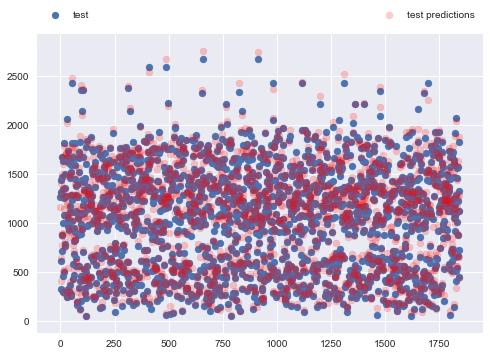

In [37]:
x = [i for i in range(len(y_test))]
plt.scatter(x, y_test, label='test', alpha=1)
plt.scatter(x, y_pred, label='test predictions', color='red', alpha=0.2)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.4)
plt.figure(figsize=(16, 16), dpi=80)
plt.show()